# Factors Encouraging Fast Food Restaurants to Enter the Market

In [ ]:
medianAge = []

for i in range(zipCode_data.shape[0]):
    url = zipCode_data['Website'][i]
    response = requests.get(url)
    soup_object = BeautifulSoup(response.content)
    agev = soup_object.find(text = 'Median resident age:')
    table = agev.find_next('table')
    textvalue = table.find_all('td')[1].text
    value = float(re.findall(r'\d+\.\d+', textvalue)[0])
    medianAge.append(value)
    
medianAge

## Introduction



Fast foods composed a large portion of our daily meals. People choose them because of their convenience, cheap price, and tasty flavor, while they also reject these “junk food” due to the high calories.

The main dataset contains information about 10000 fast-food restaurants across America. It includes the fast-food restaurants’ names, categories, detailed addresses that contain the street name, city, province, longitude, and altitude, and their websites. The table also recorded the date the fast-food restaurant was added to the dataset, which shows that more and more restaurants were built across America. Restaurants will only enter the market when they can receive profits from doing so, and this project will investigate multiple factors that may contribute to the profit. 

Normally, fast food is regarded as an inferior good, for which people buy less as their income increases. It is reasonable to assume that cities with lower real household incomes are relatively attractive for fast food restaurants. To minimize the effects of extremely poor and extremely rich, I choose to compare income with median value. Also, as a high total population means high demand for everything, including fast food, more restaurants may appear in the more populated cities. Here incurs a question: which one has a larger impact, population or population density? Additionally, the number and brands of existing competitors are also worth noticing: large brands may enter an existing market and compete with smaller restaurants, and small brands may prefer exploring new markets in cities with few existing fast-food restaurants.

In my project, the independent variables are the population, population density, the real income of citizens, and the number and brands of existing restaurants in the city. The analysis will be aiming at how these factors affect the number of fast-food restaurants in each city. The main dataset can be found on Datafiniti, and I cite the data from Kaggle https://www.kaggle.com/datasets/datafiniti/fast-food-restaurants?select=Datafiniti_Fast_Food_Restaurants_May19.csv. The data about population, population density, and real income are imported from Simplemap https://simplemaps.com/data/us-cities.

## Data Cleaning

Firstly, import the numpy and pandas, read the dataset as a Dataframe.

In [417]:
import numpy as np
import pandas as pd
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt

fastfood_data = pd.read_csv('Datafiniti_Fast_Food_Restaurants.csv')
print("Top 10 rows:")
fastfood_data.head(10)

Top 10 rows:


,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...
5,AVwc57jLkufWRAb50ROs,2015-10-23T23:59:49Z,2018-06-26T02:59:43Z,9768 Grand River Ave,Fast Food Restaurant,Detroit,US,us/mi/detroit/9768grandriverave/-791445730,42.368823,-83.138251,Wendy's,48204,MI,https://foursquare.com/v/wendys/4bfec191e584c9...,http://www.wendys.com
6,AVwc81QgkufWRAb50vnI,2015-09-21T07:47:08Z,2018-06-26T02:59:43Z,13600 W McNichols Rd,Fast Food Restaurant,Detroit,US,us/mi/detroit/13600wmcnicholsrd/-2061630068,42.416819,-83.180444,Burger King,48235,MI,https://foursquare.com/v/burger-king/4bab7981f...,"http://bk.com,http://www.bk.com"
7,AVwdVafPByjofQCxoA6y,2016-06-06T16:15:08Z,2018-06-26T02:59:41Z,4111 Oceanside Blvd,Fast Food,Oceanside,US,us/ca/oceanside/4111oceansideblvd/1143321601,33.205722,-117.288645,Chipotle Mexican Grill,92056,CA,https://www.trip.com/oceanside-ca/restaurants/...,"http://www.chipotle.com,http://www.lasalsa.com"
8,AVwc4JQKIN2L1WUfp3hU,2016-12-13T12:34:52Z,2018-06-26T02:59:32Z,162 Old Country Rd,Fast Food Restaurants,Riverhead,US,us/ny/riverhead/162oldcountryrd/267504952,40.937359,-72.650142,7-Eleven,11901,NY,http://www.local.com/business/details/yx/river...,"http://www.7-eleven.com/?yext=39326,http://www..."
9,AVwdhkOGByjofQCxp9qV,2016-04-16T16:20:41Z,2018-06-25T12:05:40Z,1407 S Stockton Ave,Fast Food Restaurant,Monahans,US,us/tx/monahans/1407sstocktonave/-1721138121,31.580721,-102.891455,Dairy Queen,79756,TX,https://foursquare.com/v/dairy-queen/4bd4fd7b6...,"http://www.dairyqueen.com,http://api.citygridm..."


Check whether there is any data missing:

In [418]:
fastfood_data.isnull().sum()

id             0
dateAdded      0
dateUpdated    0
address        0
categories     0
city           0
country        0
keys           0
latitude       0
longitude      0
name           0
postalCode     0
province       0
sourceURLs     0
websites       0
dtype: int64

The names of restaurants in this dataset have some errors, for example, there exist "McDonald's" and "McDonalds" represent the same brand but are not counted together.

In [419]:
fastfood_data.name.value_counts()[0:10]

McDonald's         1898
Taco Bell          1032
Burger King         833
Subway              776
Arby's              663
Wendy's             628
Jack in the Box     330
Pizza Hut           230
Dairy Queen         218
Domino's Pizza      215
Name: name, dtype: int64

In [420]:
import string

fastfood_data.name=fastfood_data.name.apply(lambda a:''.join([i for i in a 
                            if i not in string.punctuation]))

fastfood_data.name.value_counts()[:10]

McDonalds          1940
Taco Bell          1032
Burger King         833
Subway              776
Arbys               666
Wendys              628
Jack in the Box     330
Pizza Hut           230
Dairy Queen         218
Dominos Pizza       215
Name: name, dtype: int64

Import the population and income data.

In [421]:
pop_data = pd.read_csv('uscities.csv')
print("Top 10 rows:")
pop_data.head(10)

Top 10 rows:


,city,province,lat,lng,population,population_proper,density,income_household_median
0,New York,NY,40.6943,-73.9249,18972871.0,8736047.0,10768.2,70663.0
1,Los Angeles,CA,34.1141,-118.4068,12121244.0,3902440.0,3267.6,69778.0
2,Chicago,IL,41.8375,-87.6866,8595181.0,2742119.0,4576.6,65781.0
3,Miami,FL,25.7840,-80.2101,5711945.0,440807.0,4945.7,47860.0
4,Dallas,TX,32.7935,-96.7667,5668165.0,1300239.0,1522.2,58231.0
5,Houston,TX,29.7860,-95.3885,5650910.0,2293288.0,1394.6,56019.0
6,Philadelphia,PA,40.0077,-75.1339,5512873.0,1596865.0,4544.9,52649.0
7,Atlanta,GA,33.7628,-84.4220,5046555.0,492204.0,1419.9,69164.0
8,Washington,DC,38.9047,-77.0163,4810669.0,683154.0,4434.0,93547.0
9,Boston,MA,42.3188,-71.0852,4208580.0,672814.0,5505.8,81744.0


Check whether there is data missing:

In [422]:
pop_data.isnull().sum()

city                           0
province                       0
lat                            0
lng                            0
population                 74240
population_proper          74240
density                        0
income_household_median    77708
dtype: int64

Remove the rows with null data:

In [423]:
pop_data = pop_data.dropna()
pop_data.isnull().sum()

city                       0
province                   0
lat                        0
lng                        0
population                 0
population_proper          0
density                    0
income_household_median    0
dtype: int64

## Summary Statistics Tables

In this project, only the date added, city name, and the restaurant name are required.

In [424]:
fastfood_data = fastfood_data.drop(fastfood_data.columns[[0, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14]], axis=1)
fastfood_data.head(10)

,dateAdded,city,name
0,2015-10-19T23:47:58Z,Thibodaux,SONIC Drive In
1,2015-10-19T23:47:58Z,Thibodaux,SONIC Drive In
2,2016-03-29T05:06:36Z,Pigeon Forge,Taco Bell
3,2017-01-03T07:46:11Z,Pigeon Forge,Arbys
4,2018-06-26T02:59:43Z,Morrow,Steak n Shake
5,2015-10-23T23:59:49Z,Detroit,Wendys
6,2015-09-21T07:47:08Z,Detroit,Burger King
7,2016-06-06T16:15:08Z,Oceanside,Chipotle Mexican Grill
8,2016-12-13T12:34:52Z,Riverhead,7Eleven
9,2016-04-16T16:20:41Z,Monahans,Dairy Queen


Then count the number of restaurants in the same city.

In [425]:
cityList = fastfood_data.city.value_counts()
print('The number of cities in the list is:')
print(cityList.shape[0])

The number of cities in the list is:
2764


Restructure the data to a dataframe and set city name as index.

In [426]:
city_data = cityList.to_frame()
city_data = city_data.reset_index()
city_data = city_data.rename(columns = {"index": "city", "city": "number_of_restaurants"})
city_data = city_data.set_index("city")
city_data.head(10)

,number_of_restaurants
city,
Houston,107
Las Vegas,82
Phoenix,78
Columbus,72
Dallas,66
Orlando,65
Los Angeles,64
Miami,62
Chicago,57


In the second dataset, keep three columns. The population represents the number of people living in the urban area of that city; density is calculated by population per square kilometer; income is measured by the median household salary.

In [427]:
population_by_city = pop_data.drop(population_data2.columns[[0, 1, 2, 4]], axis = 1)
population_by_city.head(10)

,city,population,density,income_household_median
0,New York,18972871.0,10768.2,70663.0
1,Los Angeles,12121244.0,3267.6,69778.0
2,Chicago,8595181.0,4576.6,65781.0
3,Miami,5711945.0,4945.7,47860.0
4,Dallas,5668165.0,1522.2,58231.0
5,Houston,5650910.0,1394.6,56019.0
6,Philadelphia,5512873.0,4544.9,52649.0
7,Atlanta,5046555.0,1419.9,69164.0
8,Washington,4810669.0,4434.0,93547.0
9,Boston,4208580.0,5505.8,81744.0


Merge these two tables and remove rows that contain null.

In [428]:
data1 = pd.merge(population_by_city, city_data, on = "city", how = "outer")
data1 = data.dropna()
data1 = data1[data1.population > 50000]
data1 = data1.set_index("city")
data1.head(10)

,population,density,income_household_median,number_of_restaurants
city,,,,
New York,18972871.0,10768.2,70663.0,28.0
Los Angeles,12121244.0,3267.6,69778.0,64.0
Chicago,8595181.0,4576.6,65781.0,57.0
Miami,5711945.0,4945.7,47860.0,62.0
Dallas,5668165.0,1522.2,58231.0,66.0
Houston,5650910.0,1394.6,56019.0,107.0
Philadelphia,5512873.0,4544.9,52649.0,53.0
Atlanta,5046555.0,1419.9,69164.0,44.0
Washington,4810669.0,4434.0,93547.0,6.0


Then find nine representative cities.

In [429]:
topTen = cityList[0:3]
print('These ten cities are most attractive for fast-food restaurants:')
print(topTen)

These ten cities are most attractive for fast-food restaurants:
Houston      107
Las Vegas     82
Phoenix       78
Name: city, dtype: int64


In [430]:
middleTen = cityList[-2640:-2637]
print('Several restaurants exist in these cities:')
print(middleTen)

Several restaurants exist in these cities:
Saint Petersburg    12
Alexandria          12
Wichita             12
Name: city, dtype: int64


In [431]:
bottomTen = cityList[-2100:-2097]
print('Few restaurants open in these areas')
print(bottomTen)

Few restaurants open in these areas
Ephrata       4
Pleasanton    4
Florissant    4
Name: city, dtype: int64


Convert the date object into a more readable form.

In [432]:
from datetime import datetime
from dateutil.parser import parse

In [433]:
fastfood_data['dateAdded'] = fastfood_data['dateAdded'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

print(fastfood_data['dateAdded'].head())

0   2015-10-19 23:47:58
1   2015-10-19 23:47:58
2   2016-03-29 05:06:36
3   2017-01-03 07:46:11
4   2018-06-26 02:59:43
Name: dateAdded, dtype: datetime64[ns]


Plot a histogram for the date added to have a clear view of when the restaurants enter the market,

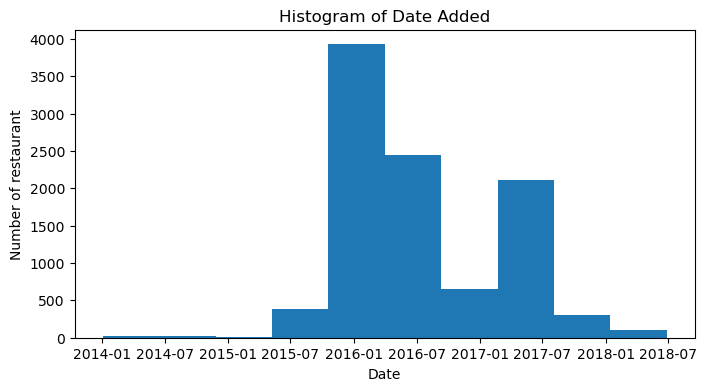

In [434]:
plt.figure(figsize = (8, 4))
plt.hist(fastfood_data["dateAdded"])
plt.xlabel("Date")
plt.ylabel("Number of restaurant")
plt.title("Histogram of Date Added")
plt.show()

According to the histogram, I choose the date 2016-4-3, which roughly divide the restaurants into two equal halves.

In [435]:
def bdate (df):
    return df[df.dateAdded < datetime(2016, 4, 3)]


def adate (df):
    return  df[df.dateAdded >= datetime(2016, 4, 3)]


fastfood_data1 = fastfood_data.set_index('city')
dateBefore = bdate(fastfood_data1)
dateAfter = adate(fastfood_data1)
print(dateBefore.shape[0], dateAfter.shape[0])

4988 5012


The names of restaurants in this dataset have some errors, for example, there exist "McDonald's" and "McDonalds" represent the same brand but are not counted together.

In [436]:
fastfood_data1.name.value_counts()[0:10]

McDonalds          1940
Taco Bell          1032
Burger King         833
Subway              776
Arbys               666
Wendys              628
Jack in the Box     330
Pizza Hut           230
Dairy Queen         218
Dominos Pizza       215
Name: name, dtype: int64

In [437]:
import string

fastfood_data1.name=fastfood_data1.name.apply(lambda a:''.join([i for i in a 
                            if i not in string.punctuation]))

fastfood_data1.name.value_counts()[:10]

McDonalds          1940
Taco Bell          1032
Burger King         833
Subway              776
Arbys               666
Wendys              628
Jack in the Box     330
Pizza Hut           230
Dairy Queen         218
Dominos Pizza       215
Name: name, dtype: int64

Sort the merged data according to the three varaibles.

In [438]:
data_pop = data1.sort_values("population", ascending= False)
data_pop.head(10)

,population,density,income_household_median,number_of_restaurants
city,,,,
New York,18972871.0,10768.2,70663.0,28.0
Los Angeles,12121244.0,3267.6,69778.0,64.0
Chicago,8595181.0,4576.6,65781.0,57.0
Miami,5711945.0,4945.7,47860.0,62.0
Dallas,5668165.0,1522.2,58231.0,66.0
Houston,5650910.0,1394.6,56019.0,107.0
Philadelphia,5512873.0,4544.9,52649.0,53.0
Atlanta,5046555.0,1419.9,69164.0,44.0
Washington,4810669.0,4434.0,93547.0,6.0


In [439]:
data_density = data1.sort_values(by = "density", ascending = False)
data_density.head(10)

,population,density,income_household_median,number_of_restaurants
city,,,,
Union City,67903.0,20421.9,53177.0,5.0
New York,18972871.0,10768.2,70663.0,28.0
Somerville,80608.0,7600.3,108896.0,1.0
Huntington Park,55439.0,7414.5,51065.0,3.0
San Francisco,3290197.0,7199.4,126187.0,16.0
Cambridge,116892.0,7111.9,112565.0,13.0
Jersey City,287146.0,6878.3,81390.0,4.0
East Orange,68918.0,6355.4,54520.0,2.0
Mount Vernon,72855.0,5943.4,68300.0,8.0


In [440]:
data_income = data1.sort_values(by = "income_household_median", ascending = False)
data_income.head(10)

,population,density,income_household_median,number_of_restaurants
city,,,,
Cupertino,60681.0,2038.2,199778.0,2.0
Palo Alto,68624.0,1091.2,194782.0,3.0
Greenwich,63455.0,507.4,180447.0,1.0
Bethesda,66294.0,1895.0,178370.0,2.0
San Ramon,85688.0,1565.7,173519.0,1.0
Dublin,69818.0,1619.0,171168.0,6.0
Pleasanton,79558.0,1279.1,167932.0,4.0
Newton,88647.0,1912.8,164607.0,4.0
Sunnyvale,155550.0,2670.3,161670.0,8.0


## Plots, Histograms, Figures

To reveal the relationship between the independent variables and the number of restaurants in the market, I choose to draw the scatter plots. The three diagrams each have the population, population density, and income on the x-axis, and restaurant number on the y-axis.

(0.0, 10000000.0)

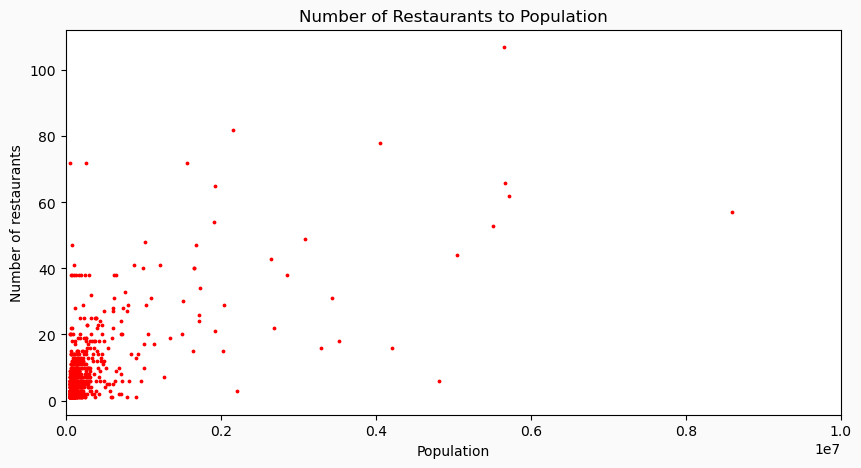

In [441]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_pop.plot(kind = "scatter", x = "population", y = "number_of_restaurants", ax = ax, s = 3, color = "red")

ax.set_title("Number of Restaurants to Population")
ax.set_xlabel("Population")
ax.set_ylabel("Number of restaurants")

plt.xlim(0, 1e7)

Each red dot represents a city's data. From the diagram, we can clearly see that few fast-food restaurants exist in the less populated regions. As the population increase, the restaurant number shows a trend of increasing.

(0.0, 10000.0)

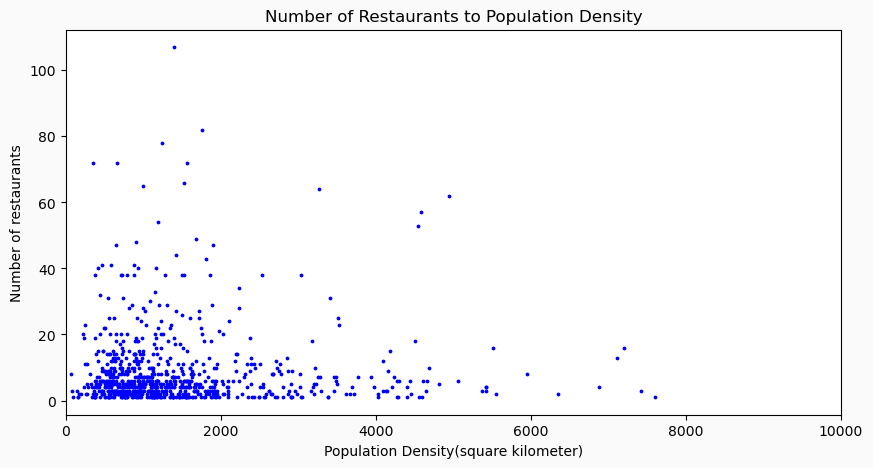

In [442]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_density.plot(kind = "scatter", x = "density", y = "number_of_restaurants", ax = ax, s = 3, color = "blue")

ax.set_title("Number of Restaurants to Population Density")
ax.set_xlabel("Population Density(square kilometer)")
ax.set_ylabel("Number of restaurants")

plt.xlim(0, 1e4)

The positions of dots in the diagram show no clear relationships between the population density and the number of fast food restaurants. In cities with low population density, some have few restaurants and some have many.

(0.0, 100000.0)

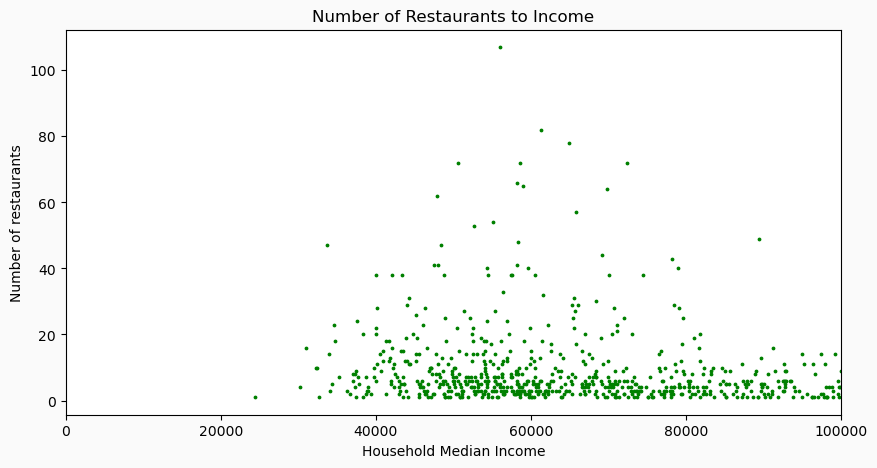

In [443]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_income.plot(kind = "scatter", x = "income_household_median", y = "number_of_restaurants", ax = ax, s = 3, color = "green")

ax.set_title("Number of Restaurants to Income")
ax.set_xlabel("Household Median Income")
ax.set_ylabel("Number of restaurants")

plt.xlim(0, 1e5)

The data is quite ambiguous about the relationship between restaurant number and income. While cities with more fast food restaurants appear more frequently in poorer regions, many low-income cities still have few restaurants.

(0.0, 100000.0)

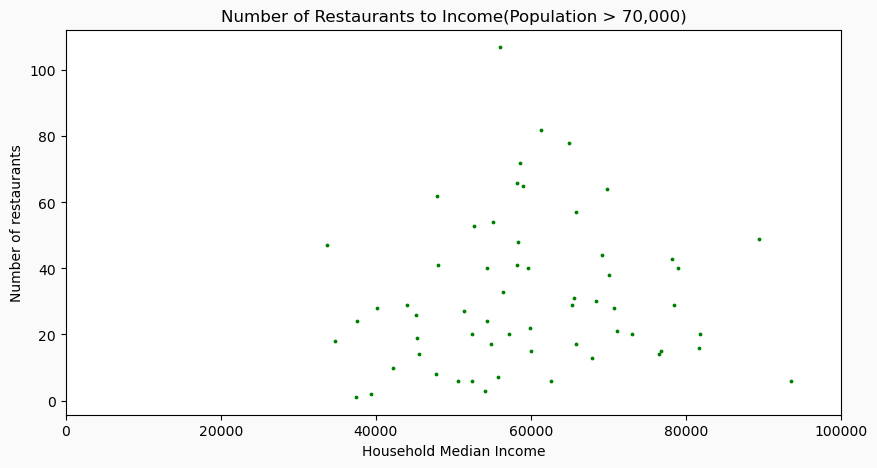

In [444]:
data_income2 = data_income[data_income.population > 700000]

fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_income2.plot(kind = "scatter", x = "income_household_median", y = "number_of_restaurants", ax = ax, s = 3, color = "green")

ax.set_title("Number of Restaurants to Income(Population > 70,000)")
ax.set_xlabel("Household Median Income")
ax.set_ylabel("Number of restaurants")

plt.xlim(0, 1e5)

Based on the result of the last diagram, I guess the population might have caused the ambiguity. So I remove the cities that have less than 70,000 people and draw the diagram again. Now the new diagram shows a negative relationship between the restaurant number and household income.

To check the effects of existing restaurants, I choose to plot the bar chart of the three representative cities. The blue bar represents the number of restaurants of a specific brand beore 2016-4-3, and the orange bar represnts the number added after that date.

<AxesSubplot:title={'center':'Phoenix'}, xlabel="Restaurant's Name", ylabel='Number'>

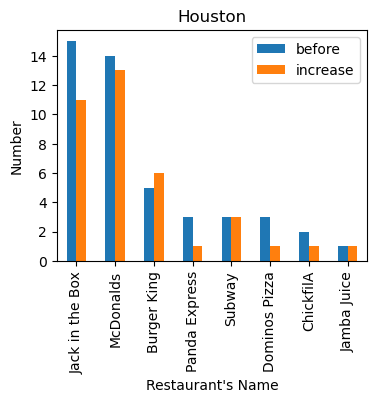

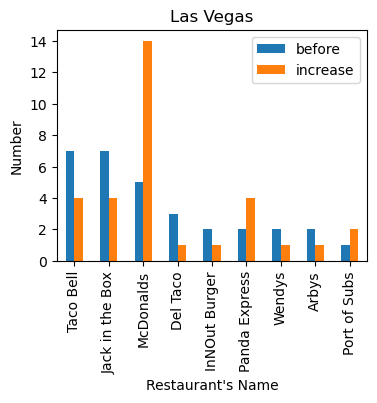

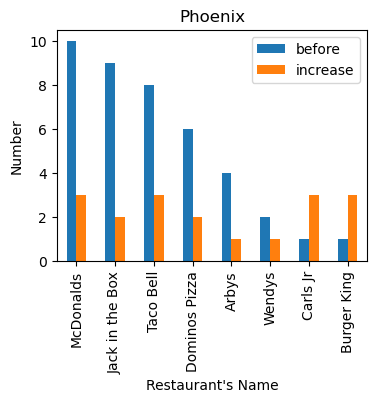

In [445]:
city_group = fastfood_data.groupby("city")

def cityfunc (cityname):
    c = city_group.get_group(cityname)
    a = bdate(c)
    b = adate(c)
    d = pd.merge(a.name.value_counts().to_frame(), b.name.value_counts().to_frame()
                 , right_index=True, left_index=True)
    d = d.rename(columns = {"name_x": "before", "name_y": "increase"})
    return d


cityfunc("Houston").plot.bar(title = "Houston", figsize = (4, 3), xlabel = "Restaurant's Name", ylabel = "Number")
cityfunc("Las Vegas").plot.bar(title = "Las Vegas", figsize = (4, 3), xlabel = "Restaurant's Name", ylabel = "Number")
cityfunc("Phoenix").plot.bar(title = "Phoenix", figsize = (4, 3), xlabel = "Restaurant's Name", ylabel = "Number")

From the data in Las Vegas, we can see that the number of fast food restaurants greatly increased, especially McDonald's. In Phoenix, few new restaurants were established, given that several large brands already exist in the city. Houston's data shows trends different from the other two: the large brands opened more restaurants while they have already taken the major portion of the market. The only common part of these three graphs is that the small brands show no large increase in their restaurant number throughout the time period.

## Conclusion

The data above can only draw conclusions about the relationships between two independent variables and the outcome. Firstly, the population is positively related to the number of fast-food restaurants in the market: a high population leads to high demand for things, which can always attract firms to enter the local market. Secondly, income is negatively related to the restaurant number. In modern cities, the high pace of life makes people prefer to feed themselves with convenient fast food. However, fast food is unhealthy, making it an inferior good, and as people have higher earnings, they will prefer to go to a more formal restaurant.

Data shows that population density is irrelevant to the outcome. As for the existing restaurants variable, the data is insufficient to draw any conclusions, but it is still clear to see that the small fast-food brands only take tiny market portions, showing that the market structure is more like an oligopoly.
